<a href="https://colab.research.google.com/github/Paul-mwaura/Natural-Language-Processing/blob/main/Mining_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!pip install twitter

In [36]:
import twitter

# Go to https://developer.twitter.com/en/apps to create an app and get values
# for these credentials, which you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://developer.twitter.com/en/docs/basics/authentication/overview/oauth
# for more information on Twitter's OAuth implementation.

In [37]:
#@title Enter Twitter Credentials
CONSUMER_KEY = '' #@param {type:"string"}
CONSUMER_SECRET_KEY = '' #@param {type:"string"}
OAUTH_TOKEN = '' #@param {type:"string"}
OAUTH_TOKEN_SECRET = '' #@param {type:"string"}

In [38]:
auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print(twitter_api)

### Retrieving trends

In [4]:
# The Yahoo! Where On Earth ID for the entire world is 1.
# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/

WORLD_WOE_ID = 1
KE_WOE_ID = 23424863    # WOEID of Kenya

# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
ke_trends = twitter_api.trends.place(_id=KE_WOE_ID)

print(world_trends)
print()
print(ke_trends)    # Kenyan Trends

[{'trends': [{'name': 'Draymond', 'url': 'http://twitter.com/search?q=Draymond', 'promoted_content': None, 'query': 'Draymond', 'tweet_volume': 70038}, {'name': '#Whosfan_1st_Anniversary', 'url': 'http://twitter.com/search?q=%23Whosfan_1st_Anniversary', 'promoted_content': None, 'query': '%23Whosfan_1st_Anniversary', 'tweet_volume': 634355}, {'name': '#후즈팬_1주년_축하해', 'url': 'http://twitter.com/search?q=%23%ED%9B%84%EC%A6%88%ED%8C%AC_1%EC%A3%BC%EB%85%84_%EC%B6%95%ED%95%98%ED%95%B4', 'promoted_content': None, 'query': '%23%ED%9B%84%EC%A6%88%ED%8C%AC_1%EC%A3%BC%EB%85%84_%EC%B6%95%ED%95%98%ED%95%B4', 'tweet_volume': 633347}, {'name': 'Ja Morant', 'url': 'http://twitter.com/search?q=%22Ja+Morant%22', 'promoted_content': None, 'query': '%22Ja+Morant%22', 'tweet_volume': 52942}, {'name': 'Steph', 'url': 'http://twitter.com/search?q=Steph', 'promoted_content': None, 'query': 'Steph', 'tweet_volume': 145571}, {'name': 'Warriors', 'url': 'http://twitter.com/search?q=Warriors', 'promoted_content':

In [5]:
for trend in world_trends[0]['trends']:
    print(trend['name'])

Draymond
#Whosfan_1st_Anniversary
#후즈팬_1주년_축하해
Ja Morant
Steph
Warriors
Wiggins
Grizzlies
#人生で一番遊んだゲーム
#Butter100M
Klay
#にじさんじ花鳥風月戦
Memphis
Grayson Allen
TEAMWORK MAKES THE DREAM WORK
Poole
ラストワン賞
マンガ道場
Golden State
視聴者の同情
FANDOM HUG
BUTTERVOTE OnBBMAs
Vaze Lynchpin Of SSR Murder
알파 오메가
好評発売中
富永一朗さん
Thiaguinho
GROUP HUG
きらめちゃ
絶賛発売中
Muster
Taylor Jenkins
Bauer
ELLE HK LOVE JISOO
Wiseman
混じりっけ無しの純粋
悪のカリスマ
Jazz
Tillman
四天王のなか
オンラインライブ
I NOMINATE
Steve Kerr
東京五輪児童・生徒81万人観戦計画
Oilers
McDavid
変更ナシ
maisa
Adam Silver
尚輝3番


In [6]:
for trend in ke_trends[0]['trends']:
    print(trend['name'])

#MasculinitySaturday
Benjamin Ayimba
#JBMuturiCoronation
GUARD YOUR FRAME
#BoycottSafariLink
#KiambuUnderNyoro
#TheMorningAfter
Ja Morant
Warriors
Draymond
Rugby
Steph
Happy Sabbath
Grizzlies
Joho
Singapore
Rest in Power
Malaria
Champ
Amerix
Orengo
Mudavadi
Born Again
Satan
PayPal
West
Governor
Pole
Jana
NTSA
Jesus
Messi
Mheshimiwa
East
Australia
Uber
Kakamega
Saudi Arabia
Aguero
Sugoi
Muranga
CJ Koome
Hapo
Amen and Amen
Ethiopia
Lakers
Powerful
May God
Thankyou
Bible


In [7]:
world_trends_set = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

ke_trends_set = set([trend['name'] 
                     for trend in ke_trends[0]['trends']]) 

common_trends = world_trends_set.intersection(ke_trends_set)

print(common_trends)

{'Warriors', 'Draymond', 'Steph', 'Grizzlies', 'Ja Morant'}


### Anatomy of a Tweet

In [8]:
import json

# Set this variable to a trending topic, 
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.

q = '#gbv' 

count = 100

# Import unquote to prevent url encoding errors in next_results
from urllib.parse import unquote

# See https://dev.twitter.com/rest/reference/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']


# Iterate through 5 more batches of results by following the cursor
for _ in range(5):
    print('Length of statuses', len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=847960489447628799&q=%23RIPSelena&count=100&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print(json.dumps(statuses[0], indent=1))

Length of statuses 100
Length of statuses 200
Length of statuses 300
Length of statuses 400
Length of statuses 500
{
 "created_at": "Sat May 22 06:00:08 +0000 2021",
 "id": 1395982791544909824,
 "id_str": "1395982791544909824",
 "text": "RT @SW10etseq: GR35 ensures women exposed to #sexualviolence have access to health care services that are responsive to trauma and include\u2026",
 "truncated": false,
 "entities": {
  "hashtags": [
   {
    "text": "sexualviolence",
    "indices": [
     45,
     60
    ]
   }
  ],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "SW10etseq",
    "name": "Janet Jones \u2696\ufe0f#50sWoman #CEDAWinLaw\ud83c\udfaf\u2640\ufe0f51% \ud83d\udc99",
    "id": 1105513179961008130,
    "id_str": "1105513179961008130",
    "indices": [
     3,
     13
    ]
   }
  ],
  "urls": []
 },
 "metadata": {
  "iso_language_code": "en",
  "result_type": "recent"
 },
 "source": "<a href=\"http://twitter.com/download/android\" rel=\"nofollow\">Twitter for Andro

In [10]:
for i in range(15):
    print()
    print(statuses[i]['text'])
    print('Favorites: ', statuses[i]['favorite_count'])
    print('Retweets: ', statuses[i]['retweet_count'])


RT @SW10etseq: GR35 ensures women exposed to #sexualviolence have access to health care services that are responsive to trauma and include…
Favorites:  0
Retweets:  5

RT @RwandaDeafwomen: Rwanda Investigation Bureau @RIB_Rw is collaborating with  @RwandaDeafwomen to train Deaf women &amp; Girls fluent in Rwan…
Favorites:  0
Retweets:  3

RT @shiburyder: The murder &amp; arson case against 30 year old Freddy Modiba, who allegedly doused &amp; set alight his girlfriend #LindiweMogale…
Favorites:  0
Retweets:  8

RT @joie_phebe: I don't even wake up 6am for class😂😂♥️
Ah!!!
Stalwarts Lions!!!!!!!!🏆
Can't wait to see y'all show part 6 who is boss oo🔥
#…
Favorites:  0
Retweets:  2

RT @AgameMagdelene: @zeaxumawit @VOADirector @VOAAfrica @VOANews @AP @JRosenworcel @USAGov @Reuters Mocking gender based violence and killi…
Favorites:  0
Retweets:  12

RT @joie_phebe: I don't even wake up 6am for class😂😂♥️
Ah!!!
Stalwarts Lions!!!!!!!!🏆
Can't wait to see y'all show part 6 who is boss oo🔥
#…
Fa

### Extracting text, screen names, and hashtags from tweets

In [11]:
status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print(json.dumps(status_texts[0:5], indent=1))
print(json.dumps(screen_names[0:5], indent=1) )
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(words[0:5], indent=1))

[
 "RT @SW10etseq: GR35 ensures women exposed to #sexualviolence have access to health care services that are responsive to trauma and include\u2026",
 "RT @RwandaDeafwomen: Rwanda Investigation Bureau @RIB_Rw is collaborating with  @RwandaDeafwomen to train Deaf women &amp; Girls fluent in Rwan\u2026",
 "RT @shiburyder: The murder &amp; arson case against 30 year old Freddy Modiba, who allegedly doused &amp; set alight his girlfriend #LindiweMogale\u2026",
 "RT @joie_phebe: I don't even wake up 6am for class\ud83d\ude02\ud83d\ude02\u2665\ufe0f\nAh!!!\nStalwarts Lions!!!!!!!!\ud83c\udfc6\nCan't wait to see y'all show part 6 who is boss oo\ud83d\udd25\n#\u2026",
 "RT @AgameMagdelene: @zeaxumawit @VOADirector @VOAAfrica @VOANews @AP @JRosenworcel @USAGov @Reuters Mocking gender based violence and killi\u2026"
]
[
 "SW10etseq",
 "RwandaDeafwomen",
 "RIB_Rw",
 "RwandaDeafwomen",
 "shiburyder"
]
[
 "sexualviolence",
 "LindiweMogale",
 "GBV",
 "VLPOCero",
 "GBV"
]
[
 "RT",
 "@SW10etseq:",
 "

### Creating a basic frequency distribution from the words in tweets

In [12]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10
    print()

[('RT', 445), ('to', 307), ('in', 232), ('the', 230), ('of', 222), ('and', 185), ('a', 181), ('#GBV', 175), ('for', 123), ('women', 115)]

[('CedawPT', 30), ('DenisMukwege', 29), ('MukwegeCitation', 28), ('UNFPAEthiopia', 27), ('SafeSpeak', 26), ('StandtoEndRape', 21), ('IfumsaOau', 19), ('stwtoken', 19), ('NdabaMandela', 19), ('ActnowAfrica', 19)]

[('GBV', 195), ('CEDAW', 23), ('SGBV', 21), ('COVID19', 17), ('sexualharassment', 16), ('femicide', 14), ('EnoughIsEnough', 14), ('FGMC', 13), ('IHW21', 10), ('gbv', 9)]



### Using prettytable to display tuples in a nice tabular format

In [13]:
from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

+-------+-------+
| Word  | Count |
+-------+-------+
| RT    |   445 |
| to    |   307 |
| in    |   232 |
| the   |   230 |
| of    |   222 |
| and   |   185 |
| a     |   181 |
| #GBV  |   175 |
| for   |   123 |
| women |   115 |
+-------+-------+
+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| CedawPT         |    30 |
| DenisMukwege    |    29 |
| MukwegeCitation |    28 |
| UNFPAEthiopia   |    27 |
| SafeSpeak       |    26 |
| StandtoEndRape  |    21 |
| IfumsaOau       |    19 |
| stwtoken        |    19 |
| NdabaMandela    |    19 |
| ActnowAfrica    |    19 |
+-----------------+-------+
+------------------+-------+
| Hashtag          | Count |
+------------------+-------+
| GBV              |   195 |
| CEDAW            |    23 |
| SGBV             |    21 |
| COVID19          |    17 |
| sexualharassment |    16 |
| femicide         |    14 |
| EnoughIsEnough   |    14 |
| FGMC             |    13 |
| IHW21            |    10 |
| gbv   

### Calculating lexical diversity for tweets

In [15]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return total_words/len(statuses)

print(f'words: {lexical_diversity(words)}')
print(f'screen_names: {lexical_diversity(screen_names)}')
print(f'hashtags: {lexical_diversity(hashtags)}')
print(f'status_texts: {average_words(status_texts)}')

words: 0.17981910214919924
screen_names: 0.21666666666666667
hashtags: 0.2591304347826087
status_texts: 20.085


### Finding the most popular retweets

In [16]:
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['retweeted_status']['id'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if 'retweeted_status' in status.keys()
           ]

# Slice off the first 5 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Tweet ID', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

+-------+-------------+---------------------+----------------------------------------------------+
| Count | Screen Name | Tweet ID            | Text                                               |
+-------+-------------+---------------------+----------------------------------------------------+
| 337   | P_Marubz    | 1390957923422113794 | RT @P_Marubz: Yhu guys #GBV is so out of control   |
|       |             |                     | in South Africa that men now beat up women even at |
|       |             |                     | their place of work. I can tell you now…           |
| 337   | P_Marubz    | 1390957923422113794 | RT @P_Marubz: Yhu guys #GBV is so out of control   |
|       |             |                     | in South Africa that men now beat up women even at |
|       |             |                     | their place of work. I can tell you now…           |
| 337   | P_Marubz    | 1390957923422113794 | RT @P_Marubz: Yhu guys #GBV is so out of control   |
|       | 

### Looking up users who have retweeted a status

In [17]:
# Get the original tweet id for a tweet from its retweeted_status node 
# and insert it here

_retweets = twitter_api.statuses.retweets(id=862359093398261760)
print([r['user']['screen_name'] for r in _retweets])

['vijoumolce1988', 'driftourare1988', 'NoNicheNC', 'livingmybestie', 'Rockawaytheday']


### Plotting frequencies of words

Text(0.5, 0, 'Word Rank')

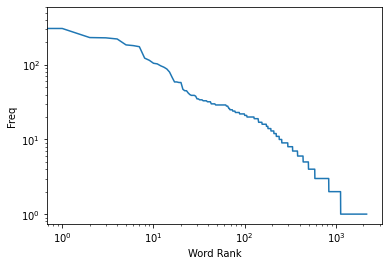

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

### Generating histograms of words, screen names, and hashtags

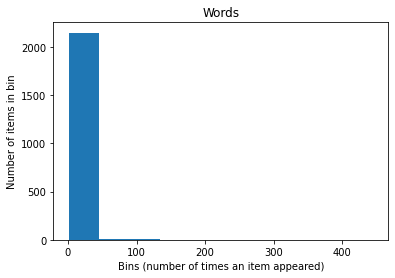

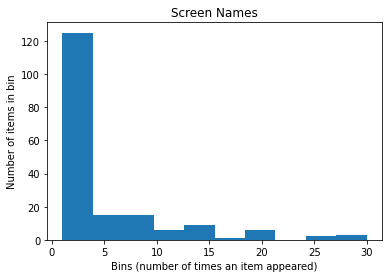

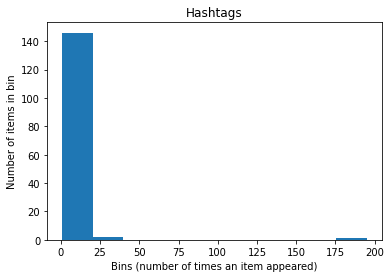

<Figure size 432x288 with 0 Axes>

In [19]:
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(list(c.values()))
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()

### Generating a histogram of retweet counts

Text(0, 0.5, 'Number of tweets in bin')

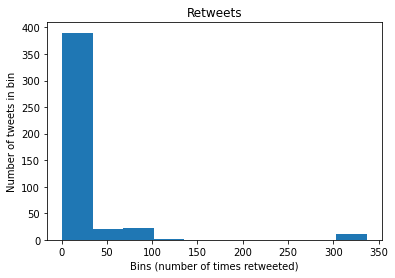

In [20]:
# Using underscores while unpacking values in
# a tuple is idiomatic for discarding them

counts = [count for count, _, _, _ in retweets]

plt.hist(counts)
plt.title('Retweets')
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')

### Sentiment Analysis

In [21]:
# pip install nltk
import nltk
nltk.download('vader_lexicon')

import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [22]:
twitter_stream = twitter.TwitterStream(auth=auth)
iterator = twitter_stream.statuses.sample()

In [23]:
tweets = []
for tweet in iterator:
    try:
        if tweet['lang'] == 'en':
            tweets.append(tweet)
    except:
        pass
    if len(tweets) == 100:
        break

In [24]:
analyzer = SentimentIntensityAnalyzer()

In [25]:
analyzer.polarity_scores('woman attacked')

{'compound': -0.4588, 'neg': 0.75, 'neu': 0.25, 'pos': 0.0}

In [26]:
analyzer.polarity_scores('child abuse')

{'compound': -0.6369, 'neg': 0.808, 'neu': 0.192, 'pos': 0.0}

In [28]:
analyzer.polarity_scores('girl mistreated')

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [29]:
scores = np.zeros(len(tweets))

for i, t in enumerate(tweets):
    # Extract the text portion of the tweet
    text = t['text']
    
    # Measure the polarity of the tweet
    polarity = analyzer.polarity_scores(text)
    
    # Store the normalized, weighted composite score
    scores[i] = polarity['compound']

In [30]:
most_positive = np.argmax(scores)
most_negative = np.argmin(scores)

In [31]:
print('{0:6.3f} : "{1}"'.format(scores[most_positive], tweets[most_positive]['text']))

 0.872 : "@jengart @GGDiversificat1 @js_cryptoart @onhicetnunc Great! I love this piece!❤️⚡"


In [32]:
print('{0:6.3f} : "{1}"'.format(scores[most_negative], tweets[most_negative]['text']))

-0.913 : "RT @txkia_: babyfathers really be lame as hell! i hate it for me🤢"
